In [2]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

In [3]:
def calc_accuracy(df):
    return (df['true_label'] == df['predict_label']).sum() / len(df)

In [4]:
LABELS = ["Downstairs", "Jogging", "Sitting", "Standing", "Upstairs", "Walking"]
# load data
cnn1d_predict = pd.read_csv('cnn1d/predict.csv', index_col=0).drop('true', axis=1)
convbbt_predict = pd.read_csv('convbbt/predict.csv', index_col=0).drop('true', axis=1)
true = pd.read_csv('cnn1d/predict.csv')['true'].map(lambda x: LABELS[x])
# to probability
convbbt_predict = convbbt_predict.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1)
convbbt_predict = convbbt_predict.apply(lambda x: x / x.sum(), axis=1)
# to label
cnn1d_predict_label = cnn1d_predict.idxmax(axis=1).map(lambda x: LABELS[int(x)])
convbbt_predict_label = convbbt_predict.idxmax(axis=1).map(lambda x: LABELS[int(x)])
# set columns
cnn1d_predict.columns = LABELS
convbbt_predict.columns = LABELS

In [5]:
print(f'cnn1d and convbbt both correct {len(true.loc[(cnn1d_predict_label==true)&(convbbt_predict_label==true)])}')
print(f'cnn1d correct and convbbt wrong {len(true.loc[(cnn1d_predict_label==true)&(convbbt_predict_label!=true)])}')
print(f'cnn1d wrong and convbbt correct {len(true.loc[(cnn1d_predict_label!=true)&(convbbt_predict_label==true)])}')
print(f'cnn1d and convbbt both wrong {len(true.loc[(cnn1d_predict_label!=true)&(convbbt_predict_label!=true)])}')

cnn1d and convbbt both correct 7574
cnn1d correct and convbbt wrong 269
cnn1d wrong and convbbt correct 268
cnn1d and convbbt both wrong 126


thredshold: 0.4
length of convbbt predict: 7427

cnn1d accuracy: 0.9521670511108413
convbbt accuracy: 0.9520456476872647

ensamble calc_accuracy: 0.9641859900449192


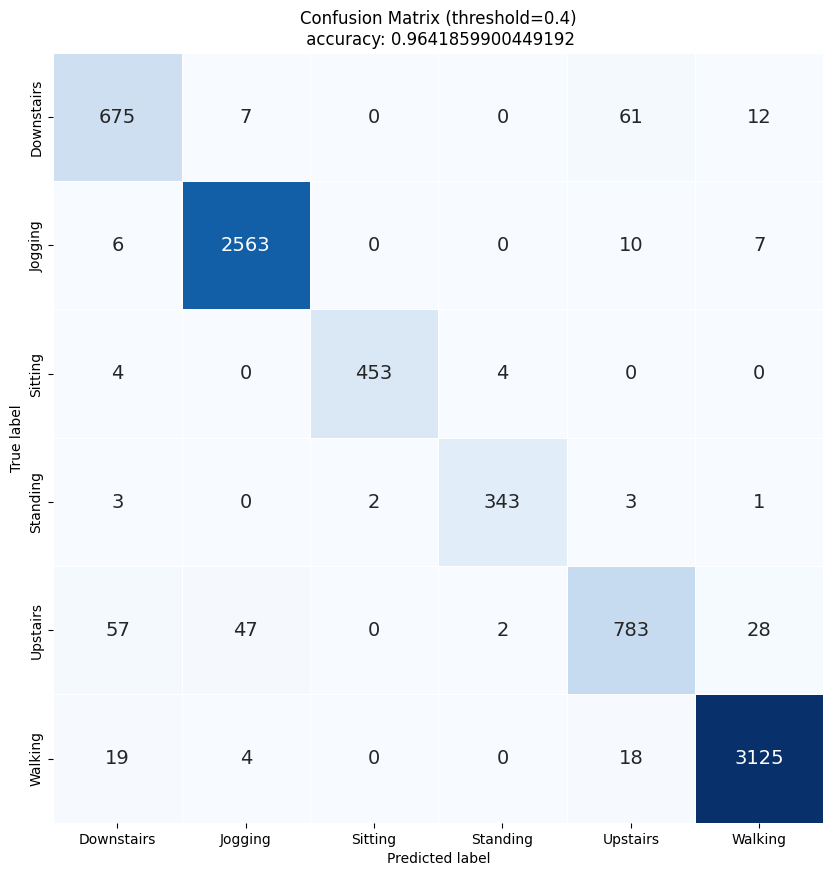

In [7]:
threshold = 0.4
print(f'thredshold: {threshold}')
print(f"length of convbbt predict: {sum(convbbt_predict.max(axis=1) > threshold)}\n")


print(f'cnn1d accuracy: {calc_accuracy(pd.DataFrame({"true_label": true, "predict_label": cnn1d_predict_label}))}')
print(f'convbbt accuracy: {calc_accuracy(pd.DataFrame({"true_label": true, "predict_label": convbbt_predict_label}))}')

ensamble_predict = convbbt_predict_label.copy()
ensamble_predict.loc[convbbt_predict.max(axis=1) < threshold] = cnn1d_predict_label.loc[convbbt_predict.max(axis=1) < threshold]

print()
print(f"ensamble calc_accuracy: {calc_accuracy(pd.DataFrame({'true_label': true, 'predict_label': ensamble_predict}))}")

cm = confusion_matrix(true, ensamble_predict, labels=LABELS)
cm_df = pd.DataFrame(cm, index=LABELS, columns=LABELS)
plt.figure(figsize=(10, 10))
sns.heatmap(
    cm_df,
    annot=True,
    fmt="d",
    linewidths=0.5,
    cmap="Blues",
    cbar=False,
    annot_kws={"size": 14},
    square=True,
)
plt.title(f"Confusion Matrix (threshold={threshold})\n accuracy: {calc_accuracy(pd.DataFrame({'true_label': true, 'predict_label': ensamble_predict}))}")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.savefig(f'ensamble_confusion_matrix_threshold{threshold}.png')

processd ensamble calc_accuracy: 0.9754948162111216


Text(0.5, 80.7222222222222, 'Predicted label')

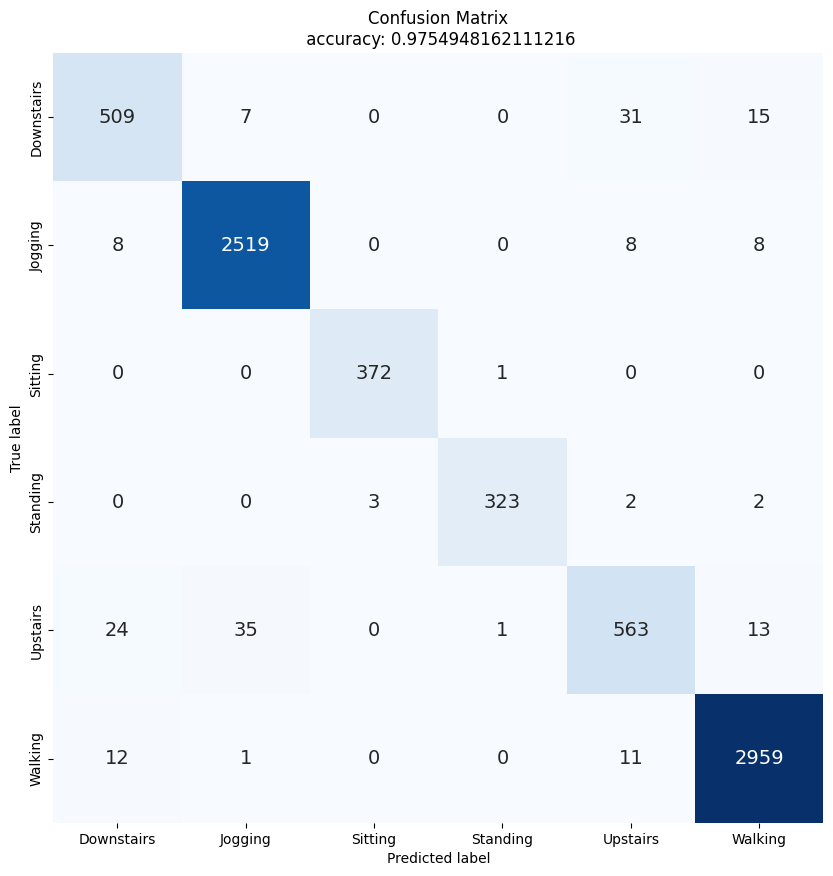

In [21]:
drop_threshold = 0.4
cnn1d_threshold = 0.5

drop_index = convbbt_predict.max(axis=1) < drop_threshold
cnn1d_predict_index = convbbt_predict.max(axis=1) < cnn1d_threshold

processd_true = true.loc[~drop_index]
processd_ensamble_predict = convbbt_predict_label.loc[~drop_index].copy()
processd_ensamble_predict.loc[cnn1d_predict_index] = cnn1d_predict_label.loc[cnn1d_predict_index]

print(f"processd ensamble calc_accuracy: {calc_accuracy(pd.DataFrame({'true_label': processd_true, 'predict_label': processd_ensamble_predict}))}")

cm = confusion_matrix(processd_true, processd_ensamble_predict, labels=LABELS)
cm_df = pd.DataFrame(cm, index=LABELS, columns=LABELS)
plt.figure(figsize=(10, 10))
sns.heatmap(
    cm_df,
    annot=True,
    fmt="d",
    linewidths=0.5,
    cmap="Blues",
    cbar=False,
    annot_kws={"size": 14},
    square=True,
)
plt.title(f"Confusion Matrix\n accuracy: {calc_accuracy(pd.DataFrame({'true_label': processd_true, 'predict_label': processd_ensamble_predict}))}")
plt.ylabel("True label")
plt.xlabel("Predicted label")